# Predictive Modeling Example

**Week04, Logistic Example Model Fitting**

ISM6136

&copy; 2023 Dr. Tim Smith

---


## Step 1: Import the libraries we will use in this notebook

In [2]:
# import neccessary libraries
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# set the random seed
np.random.seed(1) # set this to ensure the results are repeatable. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
#%matplotlib widget


## Step 2: Load the given data that we will model

In [4]:
#df = pd.read_csv('https://raw.githubusercontent.com/prof-tcsmith/data/master/RidingMowers.csv')
df = pd.read_csv('./riding_mowers.csv')

df.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner


## Step 3: Prepare the Data


In [5]:
# determine the number of rows and columns
df.shape

(24, 3)

In [6]:
# check to see if there is any missing values, and if so, then fix this issue.
df.isna().sum()

# There does not seem to be any missing value in this dataset

Income       0
Lot_Size     0
Ownership    0
dtype: int64

In [7]:
# check to see if there are any topos, and if so, then fix this issue.
df['Income'].unique()
df['Ownership'].unique()
df['Ownership'] = df['Ownership'].replace(['owners'], 'Owner') 
df['Ownership'] = df['Ownership'].replace(['nonowner'], 'Nonowner') 
df['Income'].unique()
df['Ownership'].unique()

# Change the owners to Owners and nonowners to Nonowner

array(['Owner', 'Nonowner'], dtype=object)

Text(0, 0.5, 'Lot Size (000s sqft)')

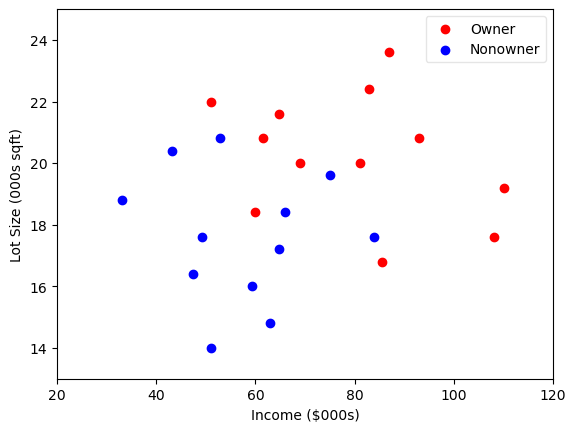

In [8]:
# visualize the data
 
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df.loc[df.Ownership=='Owner']['Income'], 
           df.loc[df.Ownership=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax.scatter(df.loc[df.Ownership=='Nonowner']['Income'], 
           df.loc[df.Ownership=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax.legend(["Owner", "Nonowner"], framealpha=0.5)
                                         
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')

## Step 4: Create a Classifier

Since the number of observations is low, you will alocate all of the data to training. Normally, you would split the data into training and testing sets.

In [25]:
# standardize the input data
scaler = StandardScaler()

# First need to remove the ownership column

dropped_columns = df.columns.drop('Ownership') ## This command gets the column names that are remaining from the data set


## Now we can use the variable 'dropped_columns' to filter the columns Income and Lot size from the data set
train_data_scaled = df[dropped_columns]



## This function scaler.fit() will normalize the input variables
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data_scaled),
                               index = train_data_scaled.index, columns = train_data_scaled.columns)

## Now we need to add the owner column back into the data frame
train_data_scaled['Ownership'] = df['Ownership']


print(train_data_scaled)





      Income  Lot_Size Ownership
0  -0.435452 -0.231370     Owner
1   0.880582 -0.904445     Owner
2  -0.187728  1.114781     Owner
3  -0.358039  0.778243     Owner
4   0.957995  1.956125     Owner
5   2.150167  0.105168     Owner
6   2.041788 -0.567907     Owner
7   0.741237  1.451319     Owner
8   0.029030  0.441706     Owner
9   1.267650  0.778243     Owner
10 -0.899935  1.283050     Owner
11  0.648340  0.441706     Owner
12  0.338685  0.273437  Nonowner
13 -0.807038  0.778243  Nonowner
14 -0.187728 -0.736176  Nonowner
15 -1.302487  0.609975  Nonowner
16  0.803168 -0.567907  Nonowner
17 -0.992832 -0.567907  Nonowner
18 -0.466418 -1.240983  Nonowner
19 -0.125797 -0.231370  Nonowner
20 -1.085728 -1.072714  Nonowner
21 -1.828900 -0.063101  Nonowner
22 -0.899935 -2.082327  Nonowner
23 -0.280625 -1.745789  Nonowner


In [28]:
train_data_scaled1 = pd.get_dummies(
    train_data_scaled, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True,    
    columns=['Ownership'], 
    dtype='int32'
)

print(train_data_scaled1)


      Income  Lot_Size  Ownership_Owner
0  -0.435452 -0.231370                1
1   0.880582 -0.904445                1
2  -0.187728  1.114781                1
3  -0.358039  0.778243                1
4   0.957995  1.956125                1
5   2.150167  0.105168                1
6   2.041788 -0.567907                1
7   0.741237  1.451319                1
8   0.029030  0.441706                1
9   1.267650  0.778243                1
10 -0.899935  1.283050                1
11  0.648340  0.441706                1
12  0.338685  0.273437                0
13 -0.807038  0.778243                0
14 -0.187728 -0.736176                0
15 -1.302487  0.609975                0
16  0.803168 -0.567907                0
17 -0.992832 -0.567907                0
18 -0.466418 -1.240983                0
19 -0.125797 -0.231370                0
20 -1.085728 -1.072714                0
21 -1.828900 -0.063101                0
22 -0.899935 -2.082327                0
23 -0.280625 -1.745789                0


In [29]:
# Use LogisticRegression from sklearn.linear_model to create a predictive model. 
features = train_data_scaled1.drop(columns=['Ownership_Owner'])
target = train_data_scaled1['Ownership_Owner']

model = LogisticRegression(
    max_iter=1000,  # increase the number of iterations
    n_jobs=-1       # use all processors
)
model.fit(features, target)



LogisticRegression(max_iter=1000, n_jobs=-1)

## Step 5: Analyze the linear regression model's performance

In [30]:

# Record the models performance using the following metrics:

results = pd.DataFrame()
results['actual'] = target
results['predicted'] = model.predict(features)



# - Accuracy
print(accuracy_score(results['actual'], results['predicted']))

# - Precision
print(precision_score(results['actual'], results['predicted']))


# - Recall
print(recall_score(results['actual'], results['predicted']))

# - F1 Score
print(f1_score(results['actual'], results['predicted']))


0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334


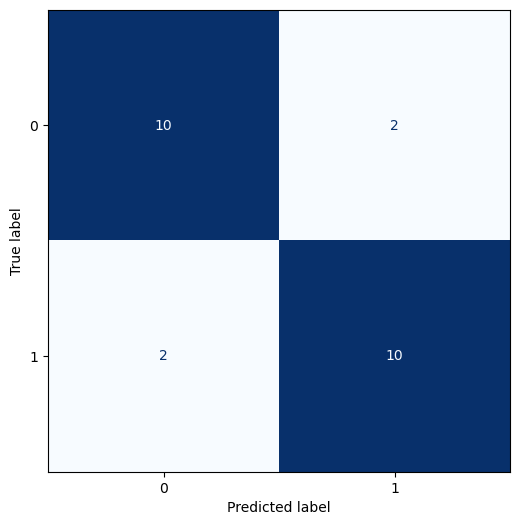

In [32]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_, colorbar=False)
fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

## Step 6: Discuss the Results

 1. Accuracy reffers to the the number of true positives or true negatives that we got from the dataset with the logistic regression model. In this model we are giving the Income and Lot_size as inputs to the model and, the model is expected to predict if the person is an Owner or a non owner. After checking the number of times the model predicted the type of ownership correctly we got an accuracy of 0.83
 
 2. Precision refers to the number of accurate predictions to the number of positive predictions made.The precision of the model, correctly predicting owners is around 83 percent.
 3. Recall refers to the ability of the classification model to identity all relevant instances, the precision for this model is around 83 percent.

 
 
 

...insert a discussion of the results from your model